The dataset provided consists of information on unemployment rates across different states and counties in the United States. It covers a time period from 2009 to 2015 and includes data for multiple months within each year. The dataset likely contains additional columns apart from the ones mentioned, such as population or other relevant factors.

Each row in the dataset represents a specific combination of year, month, state, county, and the corresponding unemployment rate for that particular time and location. The unemployment rate is measured as a percentage and indicates the proportion of unemployed individuals in the labor force.

Analyzing this dataset can provide valuable insights into the temporal and spatial variations in unemployment rates across different regions. By utilizing data visualization tools like seaborn and matplotlib, patterns, trends, and relationships within the dataset can be explored and communicated effectively. It is important to note that a more comprehensive understanding of the dataset can be achieved by examining additional columns and considering other socioeconomic factors that may influence unemployment rates.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df = pd.read_csv("/content/output.csv")

In [96]:
df

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3


In [103]:
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [99]:
df.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [100]:
df.shape

(885548, 5)

In [101]:
df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [102]:
df.dropna(inplace=True)

## **1.How did the unemployment rate vary over time across all counties?**

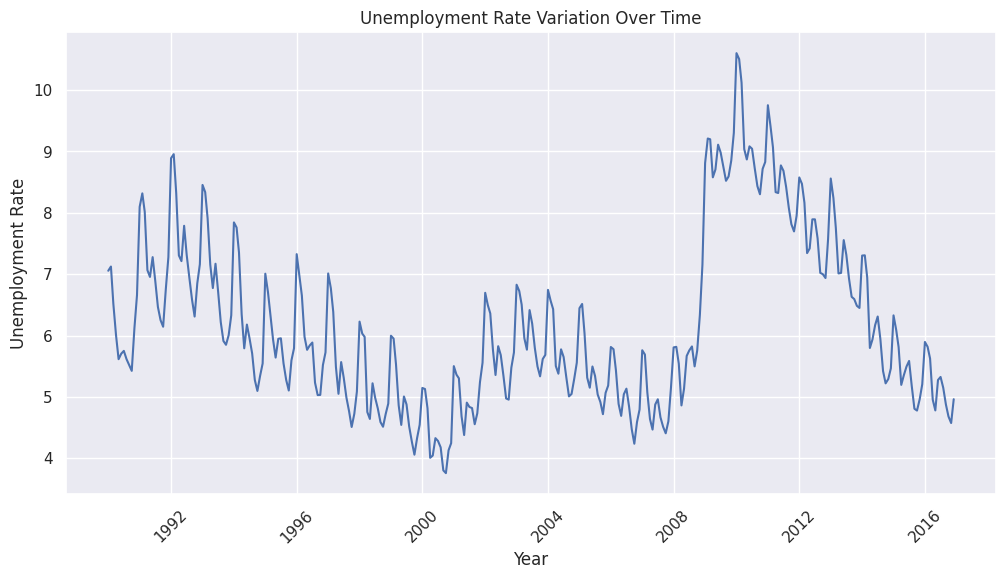

In [105]:
# Convert the 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Group the data by the date and calculate the average unemployment rate
avg_unemployment = df.groupby('Date')['Rate'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_unemployment, x='Date', y='Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Variation Over Time')
plt.xticks(rotation=45)
plt.show()

## **2.Which state had the highest average unemployment rate?**

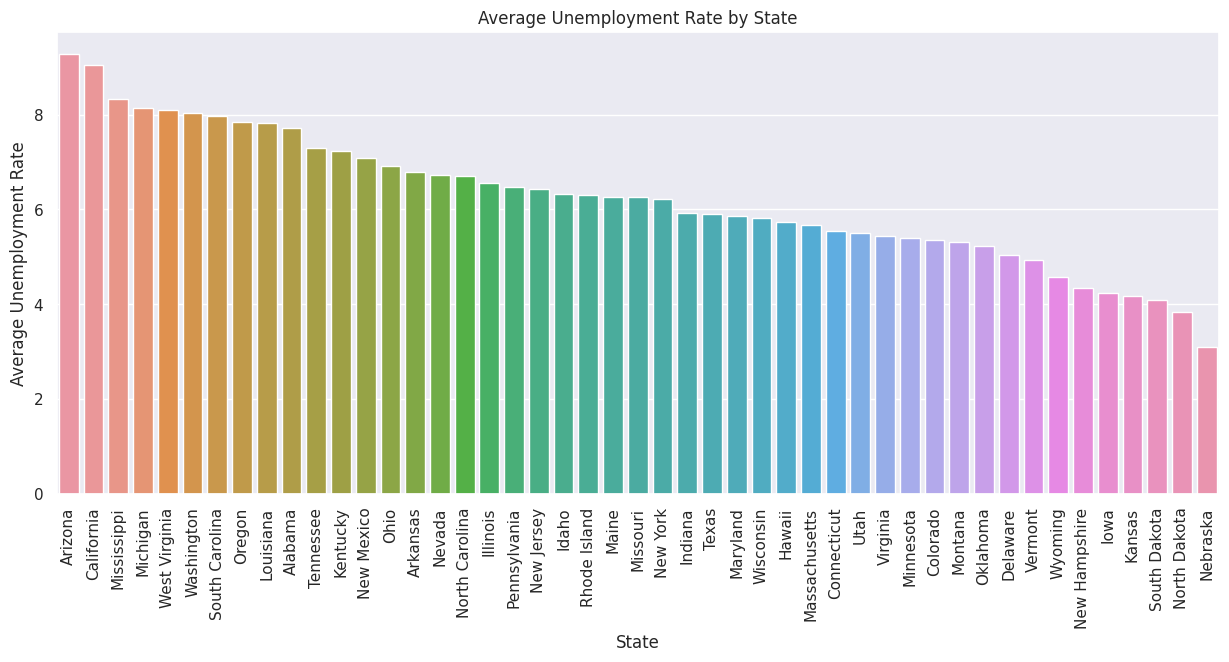

The state with the highest average unemployment rate is: Arizona


In [109]:
# Calculate the average unemployment rate for each state
average_rates = df.groupby('State')['Rate'].mean()

# Sort the average rates in descending order
sorted_rates = average_rates.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Plotting the average rates for each state
sns.barplot(x=sorted_rates.index, y=sorted_rates.values)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.xticks(rotation=90)
plt.show()

# The state with the highest average unemployment rate
highest_rate_state = sorted_rates.index[0]
print("The state with the highest average unemployment rate is:", highest_rate_state)


## **3.What was the trend of unemployment rates for a specific county in a particular state?**

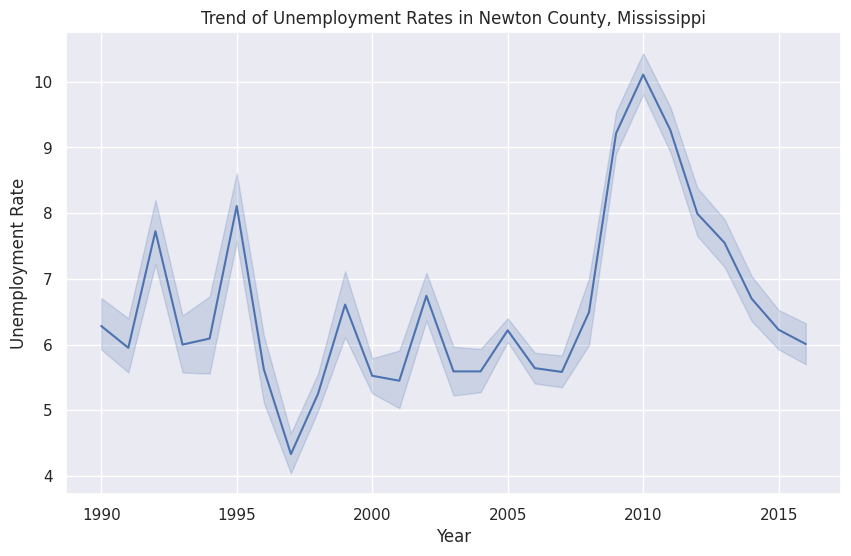

In [111]:
# Filter the data for a specific state and county
state = 'Mississippi'
county = 'Newton County'
filtered_data = df[(df['State'] == state) & (df['County'] == county)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the trend of unemployment rates over time
sns.lineplot(data=filtered_data, x='Year', y='Rate')

# Set the plot title and labels
plt.title(f'Trend of Unemployment Rates in {county}, {state}')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')

# Display the plot
plt.show()

## **4.Which month had the highest unemployment rate on average?**

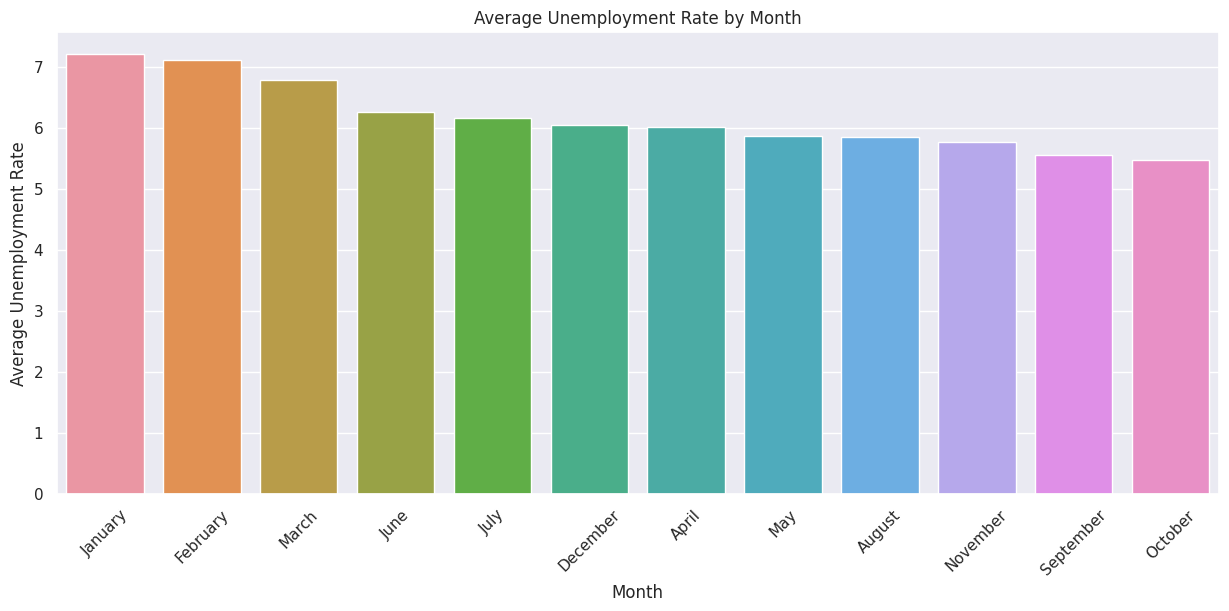

In [115]:
# Convert the 'Month' column to datetime for easier manipulation
df['Month'] = pd.to_datetime(df['Month'], format='%B')

# Group the data by month and calculate the average unemployment rate
monthly_avg = df.groupby(df['Month'].dt.month)['Rate'].mean().reset_index()

# Sort the data by average unemployment rate in descending order
monthly_avg_sorted = monthly_avg.sort_values('Rate', ascending=False)

# Define a list of month names
month_names = pd.to_datetime(monthly_avg_sorted['Month'], format='%m').dt.strftime('%B')

# Plot the average unemployment rate for each month
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
sns.barplot(x=month_names, y='Rate', data=monthly_avg_sorted)
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Month')
plt.xticks(rotation=45)
plt.show()

## **5.Can we identify any outliers in the unemployment rates across counties?**

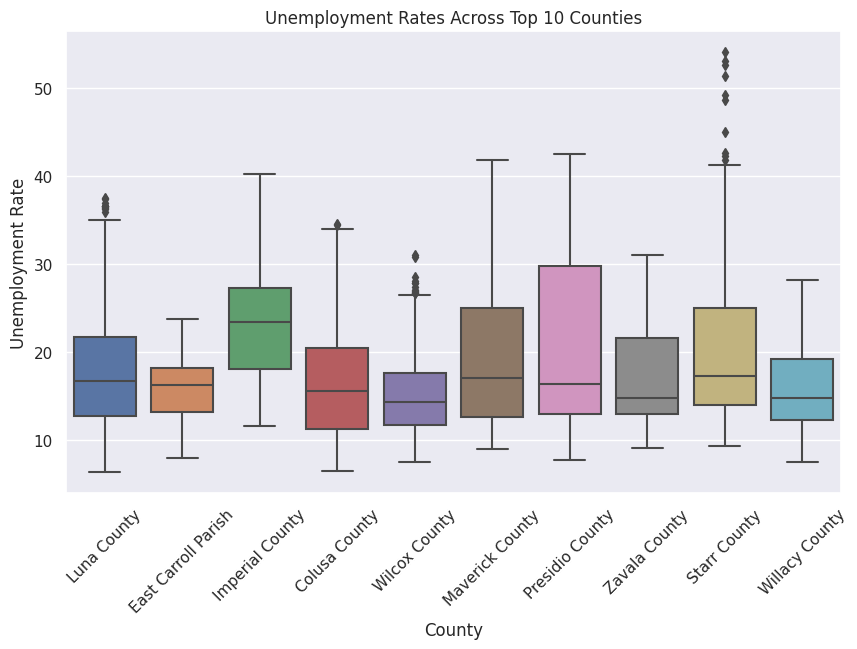

In [120]:
# Filter the top 10 counties based on the highest average unemployment rate
top_10_counties = df.groupby('County')['Rate'].mean().nlargest(10).index

# Filter the data to include only the top 10 counties
top_10_data = df[df['County'].isin(top_10_counties)]

# Create a box plot to visualize the distribution of unemployment rates across the top 10 counties
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_10_data, x='County', y='Rate')
plt.xticks(rotation=45)
plt.title('Unemployment Rates Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Unemployment Rate')
plt.show()

## **6.Can we visualize the distribution of unemployment rates across all counties?**

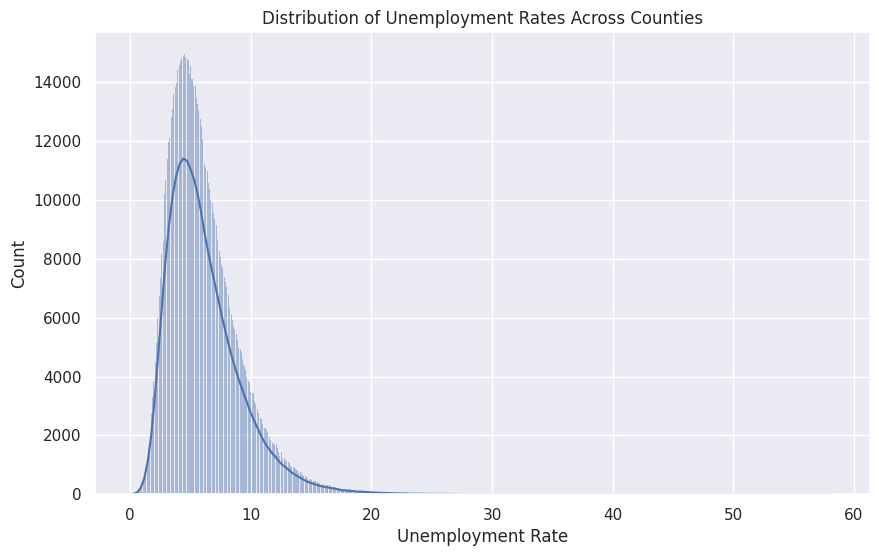

In [123]:
unemployment_rates = df['Rate']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(unemployment_rates, kde=True)
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Distribution of Unemployment Rates Across Counties')
plt.show()
